In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [66]:
df = pd.read_csv("/content/drive/MyDrive/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [67]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [69]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: ylabel='Frequency'>

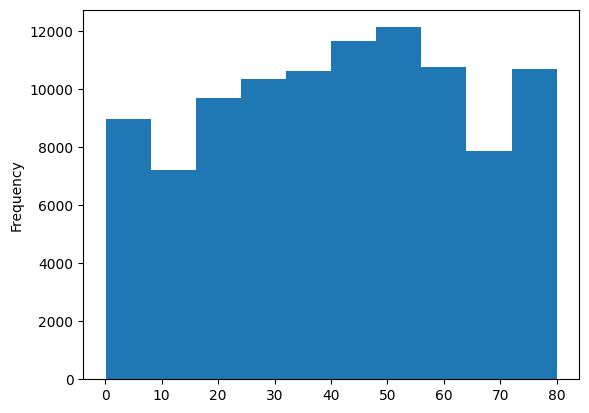

In [70]:
df.age.plot(kind="hist")

In [71]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

<Axes: xlabel='gender'>

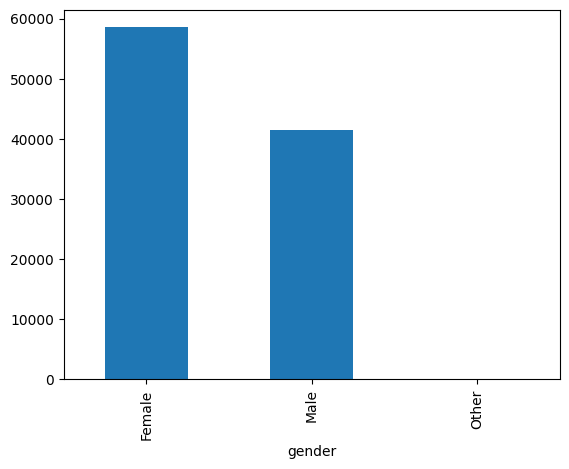

In [72]:
df.gender.value_counts().plot(kind="bar")

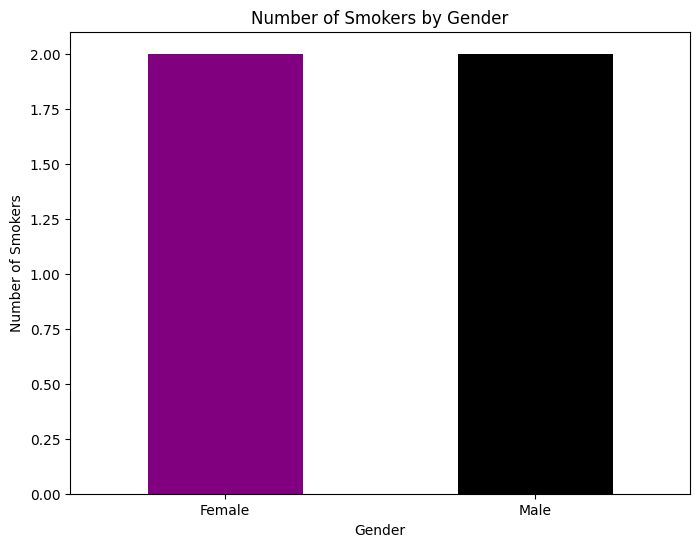

In [73]:
data = {
    'gender': ['Male', 'Female', 'Male', 'Male', 'Female', 'Female'],
    'smoking_history': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes']
}
df = pd.DataFrame(data)

smokers_by_gender = df.groupby('gender')['smoking_history'].apply(lambda x: (x == 'Yes').sum())
plt.figure(figsize=(8, 6))
smokers_by_gender.plot(kind='bar', color=['purple', 'black'])
plt.title('Number of Smokers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Smokers')
plt.xticks(rotation=0)
plt.show()

In [74]:
data = {
    'gender': ['Male', 'Female', 'Male', 'Female'],
    'age': [25, 30, 35, 40],
    'height': [170, 165, 180, 155]
}

df = pd.DataFrame(data)


df['gender'] = df['gender'].apply(lambda x: 0 if x == 'Male' else 1)


df['age'] = pd.to_numeric(df['age'])
df['height'] = pd.to_numeric(df['height'])



print(df)

   gender  age  height
0       0   25     170
1       1   30     165
2       0   35     180
3       1   40     155


In [75]:
df.corr()

,gender,age,height
gender,1.000000,0.447214,-0.832050
age,0.447214,1.000000,-0.372104
height,-0.832050,-0.372104,1.000000


<Axes: >

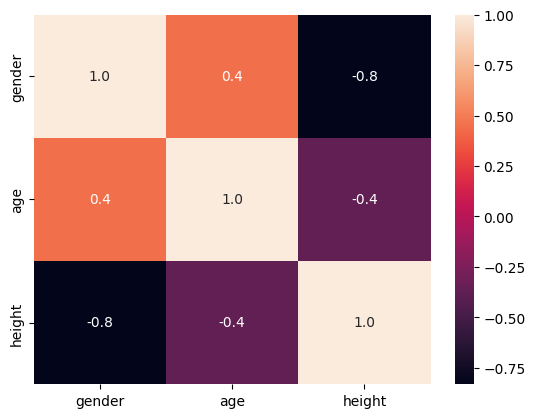

In [76]:
sns.heatmap(df.corr(),annot=True,fmt='0.1f')

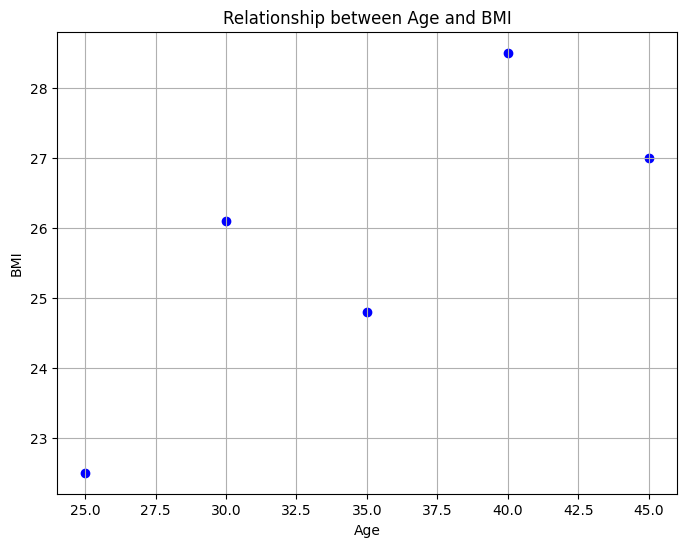

In [77]:
age = [25, 30, 35, 40, 45]
bmi = [22.5, 26.1, 24.8, 28.5, 27.0]
plt.figure(figsize=(8, 6))
plt.scatter(age, bmi, color='blue', marker='o')
plt.title('Relationship between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

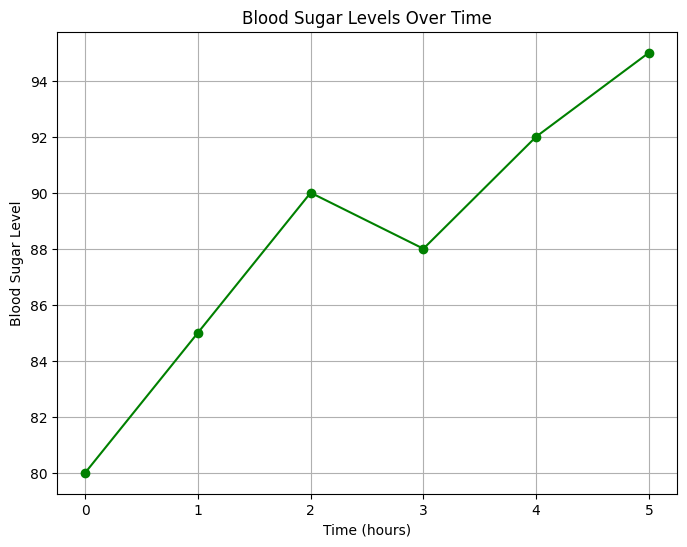

In [78]:
time = [0, 1, 2, 3, 4, 5]
blood_sugar = [80, 85, 90, 88, 92, 95]
plt.figure(figsize=(8, 6))
plt.plot(time, blood_sugar, color='green', marker='o', linestyle='-')
plt.title('Blood Sugar Levels Over Time')
plt.xlabel('Time (hours)')
plt.ylabel('Blood Sugar Level')
plt.grid(True)
plt.show()

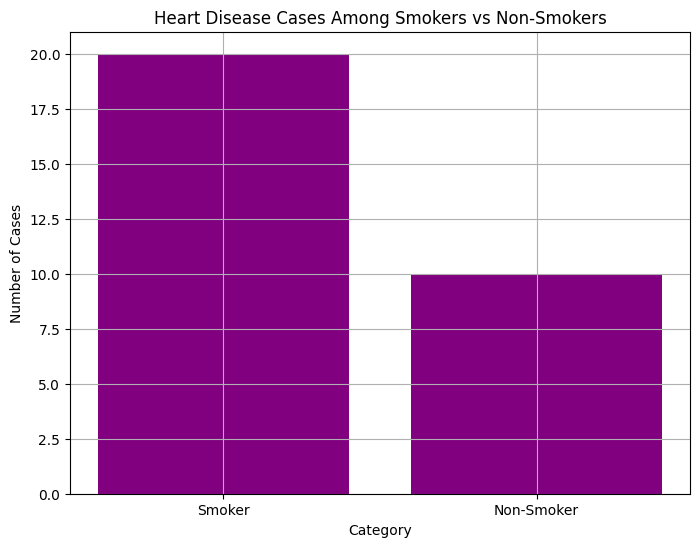

In [79]:
categories = ['Smoker', 'Non-Smoker']
heart_disease_cases = [20, 10]
plt.figure(figsize=(8, 6))
plt.bar(categories, heart_disease_cases, color='purple')
plt.title('Heart Disease Cases Among Smokers vs Non-Smokers')
plt.xlabel('Category')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

<Axes: >

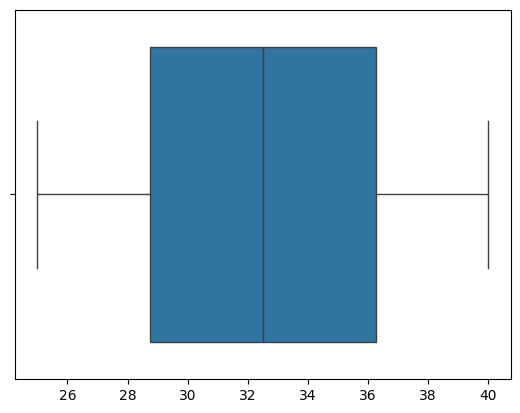

In [80]:
sns.boxplot(x=data['age'])

In [81]:
df.columns

Index(['gender', 'age', 'height'], dtype='object')

In [82]:
df.isnull().sum()

gender    0
age       0
height    0
dtype: int64

In [83]:
df['gender'].value_counts()

gender
0    2
1    2
Name: count, dtype: int64

In [84]:
print(df.columns)

Index(['gender', 'age', 'height'], dtype='object')


In [85]:
# Load and preprocess the dataset
data = {
    'gender': ['Male', 'Female', 'Male', 'Female'],
    'age': [25, 30, 35, 40],
    'height': [170, 165, 180, 155],
    'hypertension': [0, 1, 0, 1],
    'heart_disease': [1, 0, 1, 0],
    'smoking_history': ['Yes', 'No', 'Yes', 'No'],
    'bmi': [22.5, 24.0, 26.5, 28.0],
    'HbA1c_level': [5.7, 6.0, 6.5, 7.0],
    'blood_glucose_level': [110, 120, 130, 140],
    'diabetes': [0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Convert categorical features to numeric
df['gender'] = df['gender'].apply(lambda x: 0 if x == 'Male' else 1)
df['smoking_history'] = df['smoking_history'].apply(lambda x: 1 if x == 'Yes' else 0)

# Define features and target variable
X = df[['gender', 'age', 'height', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df['diabetes']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
# Initialize the classifiers
rf_clf = RandomForestClassifier(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=3)
ada_clf = AdaBoostClassifier(random_state=42)
lr_clf = LogisticRegression(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

In [92]:
# Fit the models
rf_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [93]:
# Predict on the test set
rf_pred = rf_clf.predict(X_test)
knn_pred = knn_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
lr_pred = lr_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)

In [94]:
# Evaluate the models
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

print("\nK-Nearest Neighbors Classifier:")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))

print("\nAdaBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, ada_pred))
print(classification_report(y_test, ada_pred))
print(confusion_matrix(y_test, ada_pred))

print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

print("\nDecision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))

Random Forest Classifier:
Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

[[0 0]
 [1 0]]

K-Nearest Neighbors Classifier:
Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

[[0 0]
 [1 0]]

AdaBoost Classifier:
Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

[[1]]

Decision Tree Classifier:
Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

[[1]]
